In [1]:
#Installing and importing all required libraries and packages
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
!pip install folium
import folium
from sklearn.cluster import KMeans
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib import pyplot as plt
import json 
import requests
from pandas.io.json import json_normalize
import seaborn as sns
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

     |████████████████████████████████| 276kB 3.4MB/s eta 0:00:01     |█████████████████████████▍      | 215kB 3.4MB/s eta 0:00:01


In [2]:
#Importing Prague districts data set
df = pd.read_excel('Districts.xlsx')
df

,Prague District,Cadastral Areas,Latitude,Longitude
0,Prague 01,"Staré Město, Josefov, Hradčany, Malá Strana, N...",50.085483,14.393738
1,Prague 02,"Vinohrady, Vyšehrad, Nové Město",50.073298,14.430112
2,Prague 03,"Žižkov, Vinohrady",50.085517,14.451608
3,Prague 04,"Braník, Hodkovičky, Krč, Lhotka, Podolí, Michl...",50.057666,14.428618
4,Prague 05,"Smíchov, Motol, Košíře, Radlice, Hlubočepy, Ji...",50.071339,14.369937
5,Prague 06,"Dejvice, Střešovice, Ruzyně, Liboc, Břevnov, V...",50.093302,14.322815
6,Prague 07,"Holešovice, Troja",50.104162,14.428564
7,Prague 08,"Bohnice, Kobylisy, Čimice, Karlín, Libeň, Troj...",50.119146,14.426425
8,Prague 09,"Vysočany, Prosek, Střížkov, Hrdlořezy",50.109612,14.487230
9,Prague 10,"Vršovice, Vinohrady, Strašnice, Malešice, Zábě...",50.067232,14.455295


In [3]:
#Visualizing Prague districts/cadastral areas using Folium

map_prague = folium.Map(location=[50.0593325, 14.4305775],zoom_start=12)

for lat,lng,borough,neighbourhood in zip(df['Latitude'],df['Longitude'],df['Prague District'],df['Cadastral Areas']):
    label = '{}, {}'.format(borough, neighbourhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    radius=9,
    popup=label,
    color='maroon',
    fill=True,
    fill_color='#A52A2A',
    fill_opacity=0.9,
    parse_html=False).add_to(map_prague)
map_prague



In [4]:
# Defining Foursquare Credentials and Version
CLIENT_ID = 'DMSYYK2YHI5MY2AHQALI0XXGB54VKWEXVEOIYFZKLH1KBXSD' 
CLIENT_SECRET = '5YJ2JGKBPIADS0SNTK0AMQ1ZW5MPJLHRVB151X1E5Y00WHE4' 
VERSION = '20210304'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: DMSYYK2YHI5MY2AHQALI0XXGB54VKWEXVEOIYFZKLH1KBXSD
CLIENT_SECRET:5YJ2JGKBPIADS0SNTK0AMQ1ZW5MPJLHRVB151X1E5Y00WHE4


In [5]:
#Exploration of Neighborhoods in Prague

def getNearbyVenues(names, latitudes, longitudes, radius=3000, LIMIT=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # Creating the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # Making the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # Returning only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']

    
    return(nearby_venues)

In [6]:
Prague_venues = getNearbyVenues(names=df['Prague District'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

Prague 01
Prague 02
Prague 03
Prague 04
Prague 05
Prague 06
Prague 07
Prague 08
Prague 09
Prague 10
Prague 11
Prague 12
Prague 13
Prague 14
Prague 15
Prague 16
Prague 17
Prague 18
Prague 19
Prague 20
Prague 21
Prague 22


In [7]:
Prague_Venues_only_restaurant = Prague_venues[Prague_venues['Venue Category'].str.contains('Restaurant')].reset_index(drop=True)
Prague_Venues_only_restaurant.index = np.arange(1, len(Prague_Venues_only_restaurant )+1)
print (Prague_Venues_only_restaurant['Venue Category'].value_counts())

Restaurant                       90
Czech Restaurant                 40
Italian Restaurant               32
Vegetarian / Vegan Restaurant    24
Vietnamese Restaurant            23
Chinese Restaurant               17
Indian Restaurant                15
Mexican Restaurant               12
Sushi Restaurant                 11
Asian Restaurant                 11
French Restaurant                 8
Fast Food Restaurant              6
Modern European Restaurant        6
Doner Restaurant                  5
Caucasian Restaurant              5
Mediterranean Restaurant          4
Thai Restaurant                   4
Middle Eastern Restaurant         4
Kebab Restaurant                  3
Korean Restaurant                 3
Tapas Restaurant                  3
Eastern European Restaurant       2
Scandinavian Restaurant           2
Seafood Restaurant                1
Pakistani Restaurant              1
Dim Sum Restaurant                1
Japanese Restaurant               1
Ramen Restaurant            

In [9]:
# Creating a dataframe of top 10 categories
Prague_Venues_Top10 = Prague_Venues_only_restaurant['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
Prague_Venues_Top10=Prague_Venues_Top10.reset_index()
Prague_Venues_Top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
Prague_Venues_Top10



,Venue_Category,Frequency
0,Restaurant,90
1,Czech Restaurant,40
2,Italian Restaurant,32
3,Vegetarian / Vegan Restaurant,24
4,Vietnamese Restaurant,23
5,Chinese Restaurant,17
6,Indian Restaurant,15
7,Mexican Restaurant,12
8,Sushi Restaurant,11
9,Asian Restaurant,11


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


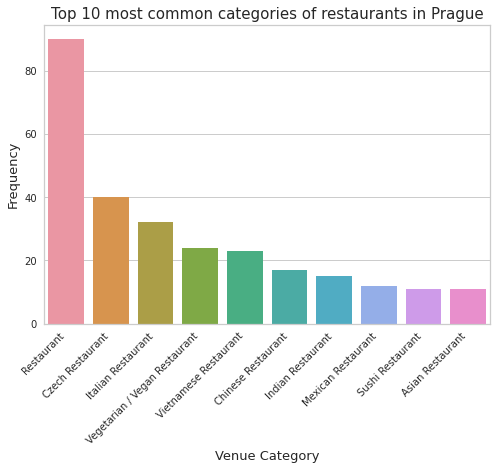

<Figure size 1296x504 with 0 Axes>

In [10]:
#Visualizing top 10 most common categories of restaurants in Prague
s=sns.barplot(x="Venue_Category", y="Frequency", data=Prague_Venues_Top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('Top 10 most common categories of restaurants in Prague', fontsize=15)
plt.xlabel("Venue Category", fontsize=13)
plt.ylabel ("Frequency", fontsize=13)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

In [14]:
Prague_Venues_only_restaurant.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Prague 01,50.085483,14.393738,Vegan's Prague,50.088565,14.398263,Vegetarian / Vegan Restaurant
2,Prague 01,50.085483,14.393738,St. Martin,50.087238,14.399998,Restaurant
3,Prague 01,50.085483,14.393738,Kuchyň,50.089413,14.397886,Restaurant
4,Prague 01,50.085483,14.393738,Aquarius Restaurant,50.087558,14.400797,Mediterranean Restaurant
5,Prague 01,50.085483,14.393738,Atelier Red & Wine,50.079743,14.403808,French Restaurant


In [15]:
Prague_Venues_restaurant = Prague_Venues_only_restaurant.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
Prague_Venues_restaurant

Neighborhood
Prague 01    12
Prague 02    12
Prague 03    13
Prague 04    18
Prague 05    16
Prague 06    31
Prague 07     9
Prague 08     8
Prague 09    18
Prague 10    16
Prague 11    14
Prague 12    15
Prague 13    21
Prague 14    16
Prague 15    14
Prague 16    10
Prague 17    23
Prague 18    12
Prague 19    16
Prague 20    19
Prague 21     7
Prague 22    15
Name: Venue Category, dtype: int64

In [16]:
Prague_Venues_restaurant_df  = Prague_Venues_restaurant.to_frame().reset_index()
Prague_Venues_restaurant_df.columns = ['Neighborhood', 'Number of Restaurant']
Prague_Venues_restaurant_df.index = np.arange(1, len(Prague_Venues_restaurant_df)+1)
list_rest_no = Prague_Venues_restaurant_df['Number of Restaurant'].to_list()
list_dist = Prague_Venues_restaurant_df['Neighborhood'].to_list()

In [17]:
# one hot encoding
Prague_onehot = pd.get_dummies(Prague_Venues_only_restaurant[['Venue Category']], prefix="", prefix_sep="")

# adding Neighborhood column back to dataframe
Prague_onehot['Neighborhood'] = Prague_Venues_only_restaurant['Neighborhood'] 

# moving Neighborhood column to the first column
fixed_columns = [Prague_onehot.columns[-1]] + list(Prague_onehot.columns[:-1])
Prague_onehot = Prague_onehot[fixed_columns]

Prague_onehot.head()

,Neighborhood,Asian Restaurant,Caucasian Restaurant,Chinese Restaurant,Czech Restaurant,Dim Sum Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
1,Prague 01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,Prague 01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,Prague 01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,Prague 01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,Prague 01,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
Prague_onehot.shape

(335, 29)

In [19]:
#Using function groupby() to show the frequency of each category of restaurants in each city district.
Prague_grouped = Prague_onehot.groupby('Neighborhood').mean().reset_index()
Prague_grouped.head()

,Neighborhood,Asian Restaurant,Caucasian Restaurant,Chinese Restaurant,Czech Restaurant,Dim Sum Restaurant,Doner Restaurant,Eastern European Restaurant,Fast Food Restaurant,French Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Pakistani Restaurant,Ramen Restaurant,Restaurant,Scandinavian Restaurant,Seafood Restaurant,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Prague 01,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.166667,0.083333,0.166667,0.0,0.000,0.0,0.083333,0.000000,0.000000,0.083333,0.0,0.0,0.250000,0.0,0.0,0.083333,0.000000,0.000000,0.083333,0.000000
1,Prague 02,0.083333,0.0,0.0,0.083333,0.0,0.083333,0.0,0.0,0.000000,0.083333,0.000000,0.0,0.000,0.0,0.000000,0.083333,0.083333,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.083333,0.000000,0.250000,0.166667
2,Prague 03,0.076923,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.076923,0.076923,0.0,0.000,0.0,0.000000,0.153846,0.000000,0.076923,0.0,0.0,0.153846,0.0,0.0,0.000000,0.076923,0.000000,0.153846,0.153846
3,Prague 04,0.000000,0.0,0.0,0.055556,0.0,0.111111,0.0,0.0,0.055556,0.055556,0.055556,0.0,0.000,0.0,0.000000,0.055556,0.055556,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.055556,0.333333,0.166667
4,Prague 05,0.000000,0.0,0.0,0.062500,0.0,0.000000,0.0,0.0,0.125000,0.062500,0.000000,0.0,0.125,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.312500,0.0,0.0,0.000000,0.000000,0.000000,0.125000,0.187500


In [20]:
num_top_venues = 10

for hood in Prague_grouped['Neighborhood']:
    print("---------------"+hood+"--------------")
    temp = Prague_grouped[Prague_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---------------Prague 01--------------
                           venue  freq
0                     Restaurant  0.25
1              French Restaurant  0.17
2             Italian Restaurant  0.17
3       Mediterranean Restaurant  0.08
4  Vegetarian / Vegan Restaurant  0.08
5               Sushi Restaurant  0.08
6              Indian Restaurant  0.08
7     Modern European Restaurant  0.08
8      Middle Eastern Restaurant  0.00
9                Thai Restaurant  0.00


---------------Prague 02--------------
                           venue  freq
0  Vegetarian / Vegan Restaurant  0.25
1          Vietnamese Restaurant  0.17
2              Indian Restaurant  0.08
3               Tapas Restaurant  0.08
4      Middle Eastern Restaurant  0.08
5             Mexican Restaurant  0.08
6               Asian Restaurant  0.08
7               Czech Restaurant  0.08
8               Doner Restaurant  0.08
9           Fast Food Restaurant  0.00


---------------Prague 03--------------
                     

In [21]:


def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]



In [22]:
#Creating a data frame with the most common restaurant venue types for each city district
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Prague_grouped['Neighborhood']

for ind in np.arange(Prague_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Prague_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prague 01,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
1,Prague 02,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
2,Prague 03,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,Prague 04,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
4,Prague 05,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant


In [23]:
Prague_grouped_clustering = Prague_grouped.drop('Neighborhood', 1)


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


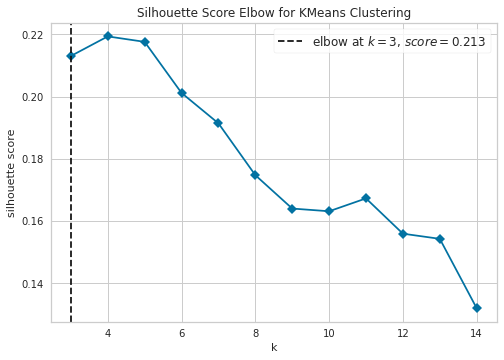

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [24]:
#Silhouette Score Elbow for KMeans Clustering

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(3,15), metric='silhouette', timings=False)
visualizer.fit(Prague_grouped_clustering)    
visualizer.poof()   

In [25]:
#Setting optimal number of clusters
kclusters = 4

#Running k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Prague_grouped_clustering)

#Checking cluster labels generated for each row in the dataframe
kmeans.labels_[0:21]

array([2, 0, 2, 0, 3, 3, 2, 2, 3, 0, 3, 1, 3, 1, 3, 3, 3, 1, 1, 3, 1],
      dtype=int32)

In [26]:
Prague_merged = df
Prague_merged.head(10)

,Prague District,Cadastral Areas,Latitude,Longitude
0,Prague 01,"Staré Město, Josefov, Hradčany, Malá Strana, N...",50.085483,14.393738
1,Prague 02,"Vinohrady, Vyšehrad, Nové Město",50.073298,14.430112
2,Prague 03,"Žižkov, Vinohrady",50.085517,14.451608
3,Prague 04,"Braník, Hodkovičky, Krč, Lhotka, Podolí, Michl...",50.057666,14.428618
4,Prague 05,"Smíchov, Motol, Košíře, Radlice, Hlubočepy, Ji...",50.071339,14.369937
5,Prague 06,"Dejvice, Střešovice, Ruzyně, Liboc, Břevnov, V...",50.093302,14.322815
6,Prague 07,"Holešovice, Troja",50.104162,14.428564
7,Prague 08,"Bohnice, Kobylisy, Čimice, Karlín, Libeň, Troj...",50.119146,14.426425
8,Prague 09,"Vysočany, Prosek, Střížkov, Hrdlořezy",50.109612,14.487230
9,Prague 10,"Vršovice, Vinohrady, Strašnice, Malešice, Zábě...",50.067232,14.455295


In [27]:
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prague 01,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
1,Prague 02,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
2,Prague 03,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,Prague 04,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
4,Prague 05,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant
5,Prague 06,Restaurant,Czech Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Caucasian Restaurant,French Restaurant,Mediterranean Restaurant,Korean Restaurant
6,Prague 07,Vietnamese Restaurant,Restaurant,Modern European Restaurant,French Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Caucasian Restaurant,Chinese Restaurant
7,Prague 08,Modern European Restaurant,Italian Restaurant,Dim Sum Restaurant,Doner Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant
8,Prague 09,Czech Restaurant,Restaurant,Indian Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Ramen Restaurant
9,Prague 10,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mexican Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Tapas Restaurant,Pakistani Restaurant


In [28]:
neighborhoods_venues_sorted_w_clusters = neighborhoods_venues_sorted

In [29]:
neighborhoods_venues_sorted_w_clusters

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prague 01,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
1,Prague 02,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
2,Prague 03,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,Prague 04,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
4,Prague 05,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant
5,Prague 06,Restaurant,Czech Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Caucasian Restaurant,French Restaurant,Mediterranean Restaurant,Korean Restaurant
6,Prague 07,Vietnamese Restaurant,Restaurant,Modern European Restaurant,French Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Caucasian Restaurant,Chinese Restaurant
7,Prague 08,Modern European Restaurant,Italian Restaurant,Dim Sum Restaurant,Doner Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant
8,Prague 09,Czech Restaurant,Restaurant,Indian Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Ramen Restaurant
9,Prague 10,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mexican Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Tapas Restaurant,Pakistani Restaurant


In [30]:
neighborhoods_venues_sorted_w_clusters.insert(0, 'Cluster Labels', kmeans.labels_)

In [31]:
neighborhoods_venues_sorted_w_clusters

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,2,Prague 01,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
1,0,Prague 02,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
2,2,Prague 03,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,0,Prague 04,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
4,3,Prague 05,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant
5,3,Prague 06,Restaurant,Czech Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Caucasian Restaurant,French Restaurant,Mediterranean Restaurant,Korean Restaurant
6,2,Prague 07,Vietnamese Restaurant,Restaurant,Modern European Restaurant,French Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Caucasian Restaurant,Chinese Restaurant
7,2,Prague 08,Modern European Restaurant,Italian Restaurant,Dim Sum Restaurant,Doner Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant
8,3,Prague 09,Czech Restaurant,Restaurant,Indian Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Ramen Restaurant
9,0,Prague 10,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mexican Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Tapas Restaurant,Pakistani Restaurant


In [32]:
#Merging Prague_grouped with Prague_data to add latitude/longitude for each Neighborhood

Prague_merged = df

Prague_merged.rename(columns={'Prague District':'Neighborhood'}, inplace=True)

Prague_merged = Prague_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Prague_merged.head() 

,Neighborhood,Cadastral Areas,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Prague 01,"Staré Město, Josefov, Hradčany, Malá Strana, N...",50.085483,14.393738,2,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
1,Prague 02,"Vinohrady, Vyšehrad, Nové Město",50.073298,14.430112,0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
2,Prague 03,"Žižkov, Vinohrady",50.085517,14.451608,2,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,Prague 04,"Braník, Hodkovičky, Krč, Lhotka, Podolí, Michl...",50.057666,14.428618,0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
4,Prague 05,"Smíchov, Motol, Košíře, Radlice, Hlubočepy, Ji...",50.071339,14.369937,3,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant


In [33]:
#Creating map
map_restaurants10 = folium.Map(location=[50.0593325, 14.4305775],zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon, poi, cluster in zip(Prague_merged['Latitude'], 
                                  Prague_merged['Longitude'], 
                                  Prague_merged['Neighborhood'], 
                                  Prague_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=list_rest_no[list_dist.index(poi)]*0.5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_restaurants10)
       
map_restaurants10


In [34]:


Prague_merged.loc[Prague_merged['Cluster Labels'] == 0, Prague_merged.columns[[1] + list(range(4, Prague_merged.shape[1]))]]



,Cadastral Areas,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,"Vinohrady, Vyšehrad, Nové Město",0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Middle Eastern Restaurant,Czech Restaurant,Doner Restaurant,Indian Restaurant,Mexican Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
3,"Braník, Hodkovičky, Krč, Lhotka, Podolí, Michl...",0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Doner Restaurant,Thai Restaurant,Czech Restaurant,French Restaurant,Middle Eastern Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant
9,"Vršovice, Vinohrady, Strašnice, Malešice, Zábě...",0,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Mexican Restaurant,Restaurant,Chinese Restaurant,Indian Restaurant,Italian Restaurant,Korean Restaurant,Tapas Restaurant,Pakistani Restaurant


In [35]:
Prague_merged.loc[Prague_merged['Cluster Labels'] == 1, Prague_merged.columns[[1] + list(range(4, Prague_merged.shape[1]))]]

,Cadastral Areas,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,"Modřany, Komořany, Točná, Cholupice, Kamýk, Li...",1,Restaurant,Asian Restaurant,Chinese Restaurant,Italian Restaurant,Sushi Restaurant,Mediterranean Restaurant,Japanese Restaurant,Caucasian Restaurant,Czech Restaurant,Dim Sum Restaurant
13,"Kyje, Hostavice, Černý Most, Hloubětín, Dolní ...",1,Restaurant,Italian Restaurant,Caucasian Restaurant,Sushi Restaurant,Czech Restaurant,Scandinavian Restaurant,Eastern European Restaurant,Fast Food Restaurant,Indian Restaurant,Vietnamese Restaurant
17,"Letňany, Čakovice, Třeboradice, Miškovice",1,Restaurant,Chinese Restaurant,Sushi Restaurant,Fast Food Restaurant,Middle Eastern Restaurant,Italian Restaurant,Vietnamese Restaurant,Japanese Restaurant,Caucasian Restaurant,Czech Restaurant
18,"Kbely, Vinoř, Satalice",1,Restaurant,Italian Restaurant,Asian Restaurant,Thai Restaurant,Sushi Restaurant,Chinese Restaurant,Middle Eastern Restaurant,Fast Food Restaurant,Japanese Restaurant,Caucasian Restaurant
20,"Újezd nad Lesy, Klánovice, Koloděje, Běchovice",1,Restaurant,Italian Restaurant,Czech Restaurant,Mediterranean Restaurant,Vietnamese Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant,Doner Restaurant


In [36]:
Prague_merged.loc[Prague_merged['Cluster Labels'] == 2, Prague_merged.columns[[1] + list(range(4, Prague_merged.shape[1]))]]

,Cadastral Areas,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Staré Město, Josefov, Hradčany, Malá Strana, N...",2,Restaurant,Italian Restaurant,French Restaurant,Sushi Restaurant,Modern European Restaurant,Mediterranean Restaurant,Vegetarian / Vegan Restaurant,Indian Restaurant,Vietnamese Restaurant,Caucasian Restaurant
2,"Žižkov, Vinohrady",2,Vietnamese Restaurant,Restaurant,Vegetarian / Vegan Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Modern European Restaurant,Asian Restaurant,Tapas Restaurant,Ramen Restaurant
6,"Holešovice, Troja",2,Vietnamese Restaurant,Restaurant,Modern European Restaurant,French Restaurant,Mexican Restaurant,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Caucasian Restaurant,Chinese Restaurant
7,"Bohnice, Kobylisy, Čimice, Karlín, Libeň, Troj...",2,Modern European Restaurant,Italian Restaurant,Dim Sum Restaurant,Doner Restaurant,Japanese Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant


In [37]:
Prague_merged.loc[Prague_merged['Cluster Labels'] == 3, Prague_merged.columns[[1] + list(range(4, Prague_merged.shape[1]))]]

,Cadastral Areas,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,"Smíchov, Motol, Košíře, Radlice, Hlubočepy, Ji...",3,Restaurant,Vietnamese Restaurant,Kebab Restaurant,French Restaurant,Vegetarian / Vegan Restaurant,Czech Restaurant,Indian Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant
5,"Dejvice, Střešovice, Ruzyně, Liboc, Břevnov, V...",3,Restaurant,Czech Restaurant,Italian Restaurant,Chinese Restaurant,Vietnamese Restaurant,Mexican Restaurant,Caucasian Restaurant,French Restaurant,Mediterranean Restaurant,Korean Restaurant
8,"Vysočany, Prosek, Střížkov, Hrdlořezy",3,Czech Restaurant,Restaurant,Indian Restaurant,Vietnamese Restaurant,Pakistani Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,Modern European Restaurant,Asian Restaurant,Ramen Restaurant
10,"Šeberov, Újezd u Průhonic, Křeslice, Chodov, Háje",3,Restaurant,Czech Restaurant,Asian Restaurant,Thai Restaurant,Indian Restaurant,Italian Restaurant,Kebab Restaurant,Caucasian Restaurant,Chinese Restaurant,Dim Sum Restaurant
12,"Stodůlky, Třebonice, Řeporyje, Zadní Kopanina",3,Czech Restaurant,Chinese Restaurant,Vietnamese Restaurant,Restaurant,Italian Restaurant,Caucasian Restaurant,Sushi Restaurant,Seafood Restaurant,Fast Food Restaurant,Indian Restaurant
14,"Horní Měcholupy, Hostivař, Dolní Měcholupy, Št...",3,Czech Restaurant,Restaurant,Sushi Restaurant,Asian Restaurant,Mexican Restaurant,Italian Restaurant,Kebab Restaurant,Japanese Restaurant,Caucasian Restaurant,Chinese Restaurant
15,"Radotín, Velká Chuchle, Malá Chuchle, Lochkov,...",3,Restaurant,Vietnamese Restaurant,Chinese Restaurant,Czech Restaurant,Doner Restaurant,Mexican Restaurant,Italian Restaurant,Kebab Restaurant,Caucasian Restaurant,Dim Sum Restaurant
16,"Řepy, Zličín, Sobín, Třebonice",3,Restaurant,Czech Restaurant,Chinese Restaurant,Italian Restaurant,Vietnamese Restaurant,Mexican Restaurant,Caucasian Restaurant,Fast Food Restaurant,French Restaurant,Vegetarian / Vegan Restaurant
19,Horní Počernice,3,Restaurant,Italian Restaurant,Czech Restaurant,Indian Restaurant,Thai Restaurant,Caucasian Restaurant,Sushi Restaurant,Chinese Restaurant,Scandinavian Restaurant,Eastern European Restaurant
21,"Uhříněves, Hájek u Uhříněvsi, Pitkovice, Kolov...",3,Restaurant,Czech Restaurant,Vietnamese Restaurant,Chinese Restaurant,Italian Restaurant,Mexican Restaurant,Asian Restaurant,Sushi Restaurant,Indian Restaurant,Caucasian Restaurant
